# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [28]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [30]:
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


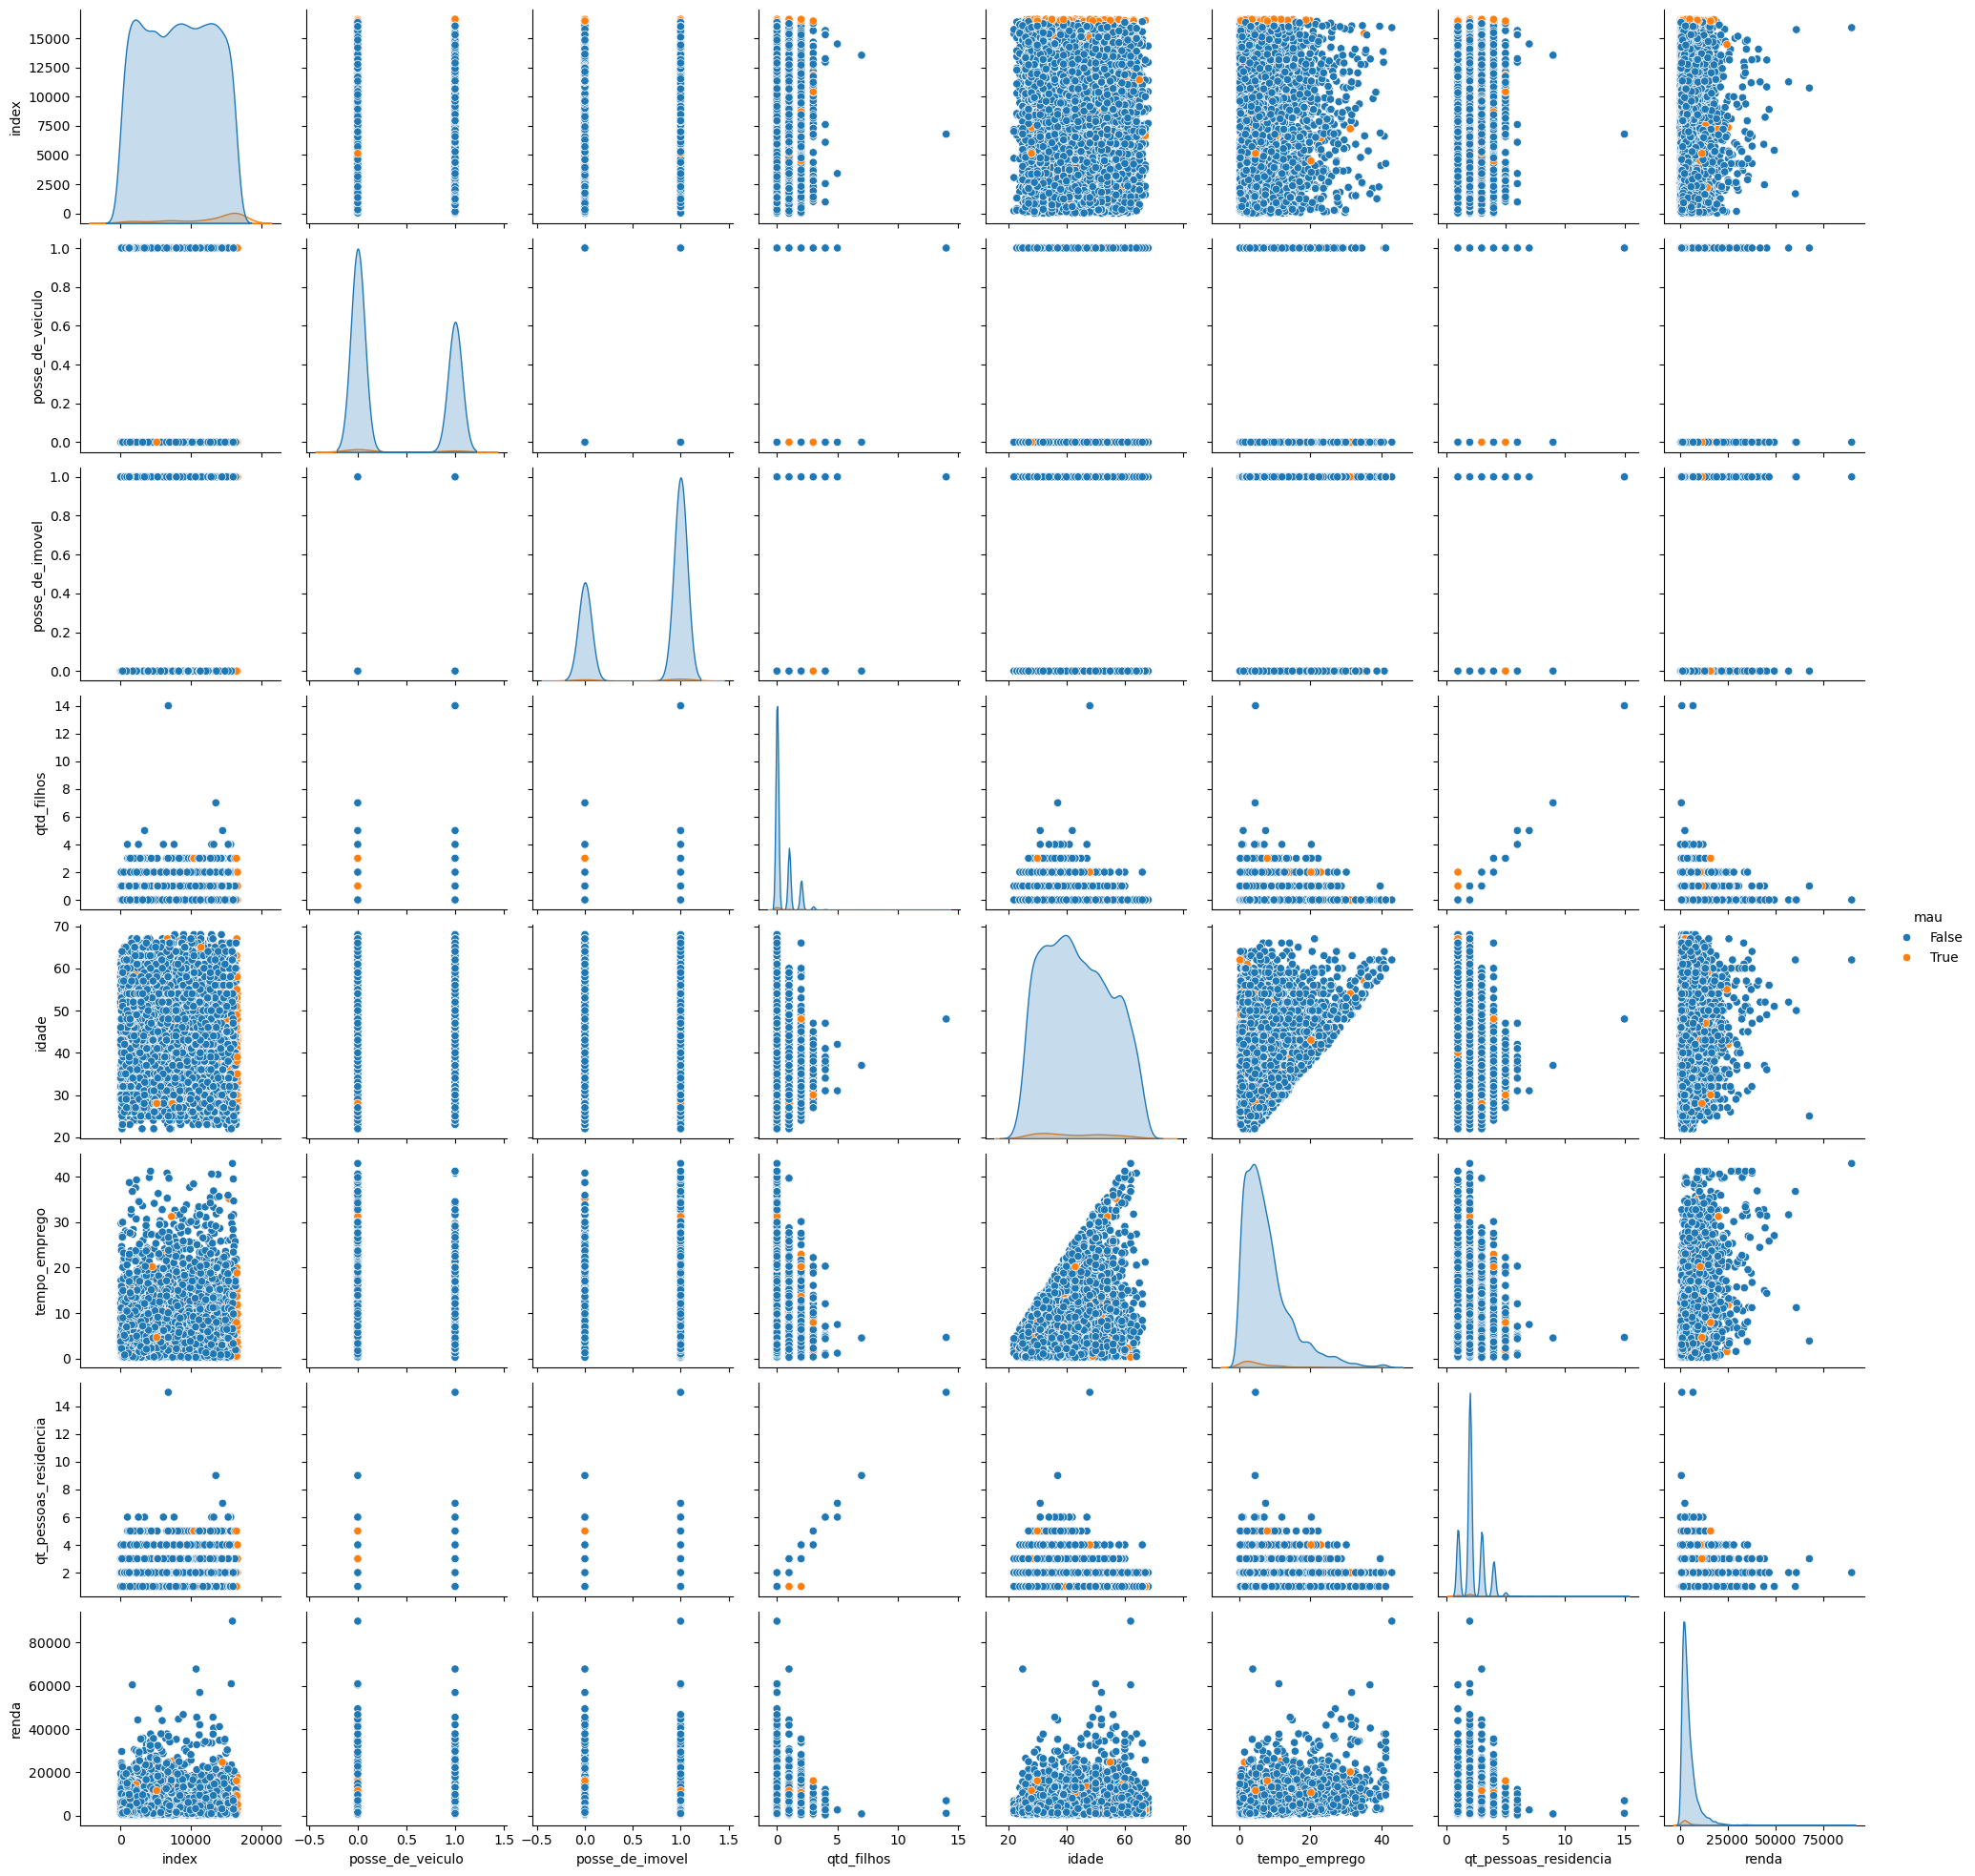

In [40]:

sns.pairplot(df, hue = 'mau')
plt.show()

In [44]:
df.select_dtypes(include=['int64', 'float64']).corr()

,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
index,1.000000,0.039734,-0.047971,-0.034574,0.041818,-0.001740
qtd_filhos,0.039734,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.047971,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.034574,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.041818,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,-0.001740,0.009567,0.042570,0.394235,0.020977,1.000000


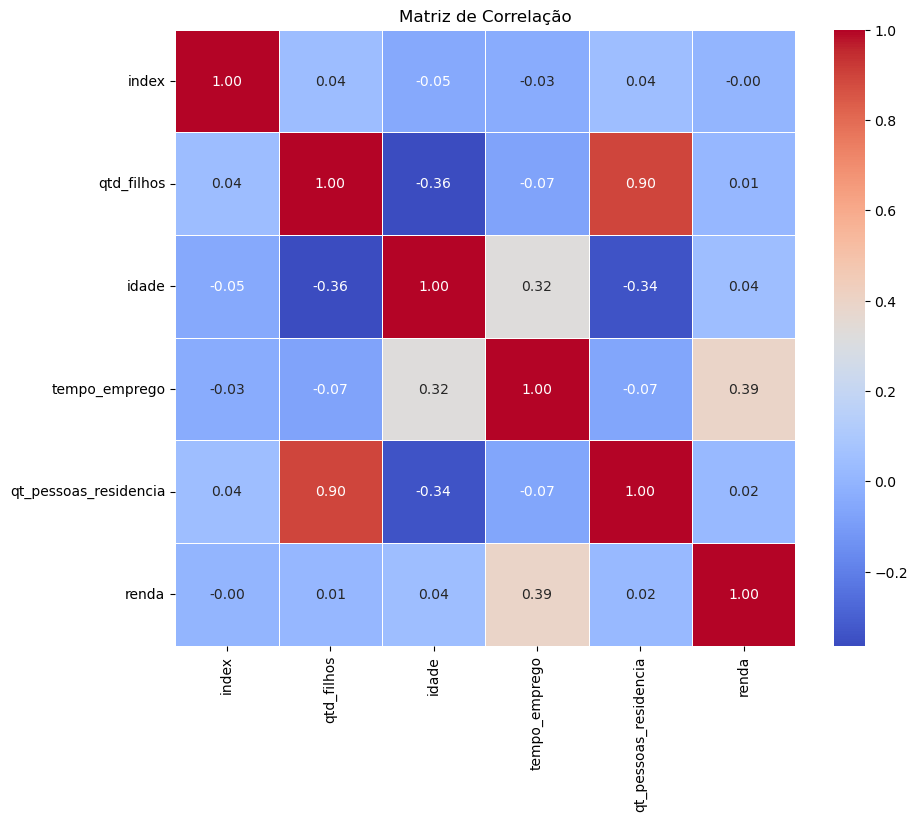

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


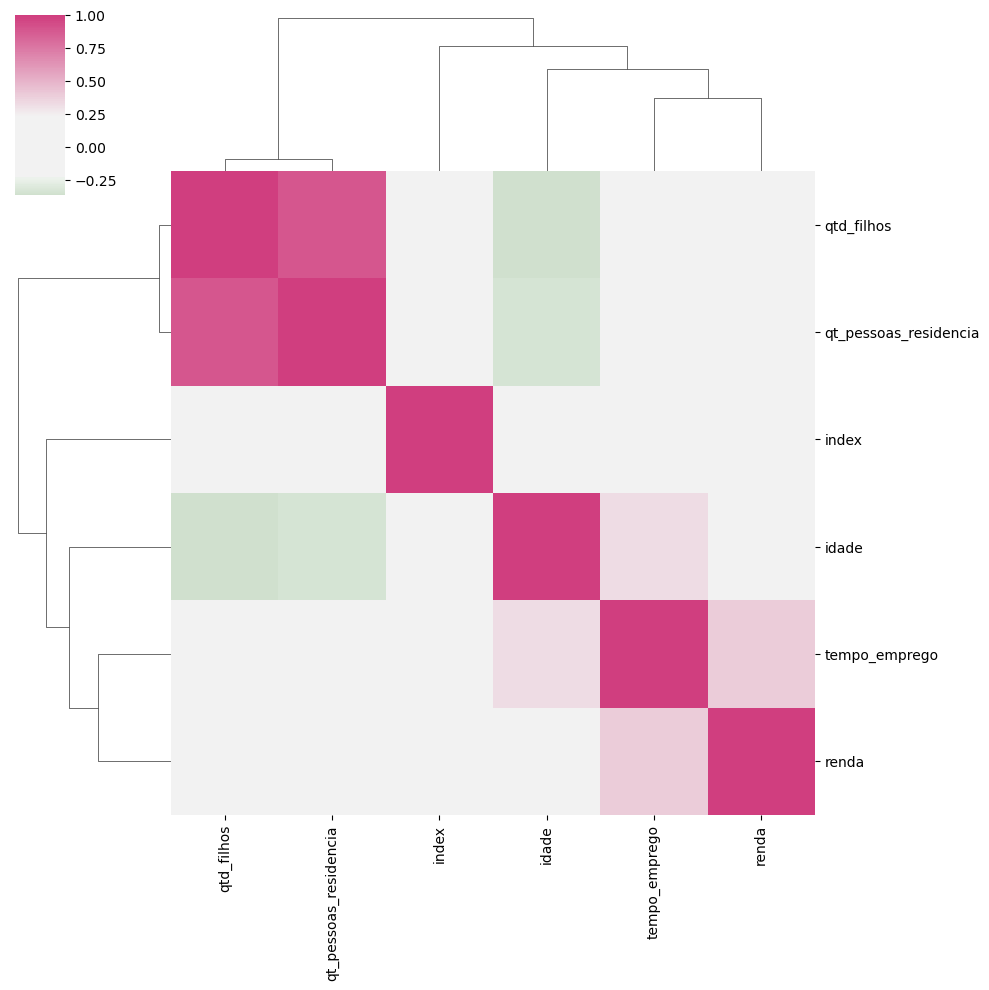

In [48]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df.select_dtypes(include=['int64', 'float64']).corr(), figsize=(10, 10), center = 0, cmap=cmap)

-Olhando para a matriz de correlação pode se ver que a quantidade de filhos tem muita relação com o numero de pessoas por residencia, algo esperado.
outra relação que pode ser elevante tambem é a renda e o tempo de emprego.

-Olhando para a matriz de disperção é possivel se ver que não há muitas variaveis que possuam comportamento linear. Assim como varias variaveis compoem duas retas em x= 1 e x = 0, por serem binarias. apesar de houver variaveis com comportamento não linear, os gráficos indicam que linearidade ainda assim capturaria informações uteis ou relevantes, sendo assim ainda há a possibilidade de se usar regressão linear.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='renda'>

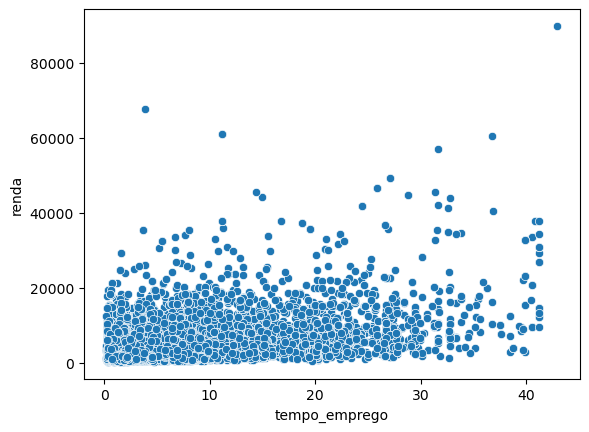

In [56]:
sns.scatterplot(data = df, x = 'tempo_emprego', y = 'renda')

<Axes: xlabel='idade', ylabel='renda'>

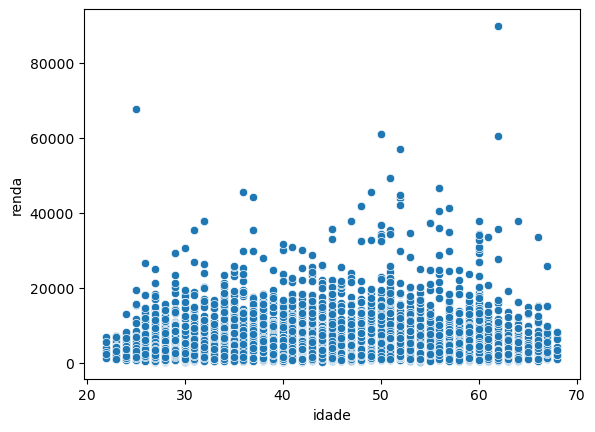

In [58]:
sns.scatterplot(data = df, x = 'idade', y = 'renda')

3) Na su aopinião, há outliers na variável renda?

sim, no primeiro gráfico há um outlier muito evidente acima de x = 40 e y = 800000

4) Calcule o logaritmo da variável renda e repita a sequência de análise

<Axes: xlabel='tempo_emprego', ylabel='log_renda'>

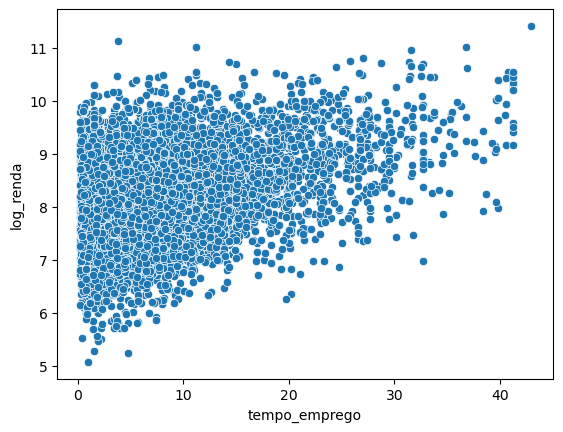

In [67]:
df_log = df.copy()
df_log['log_renda'] = np.log(df_log['renda'])
sns.scatterplot(data = df_log, x = 'tempo_emprego', y = 'log_renda')

<Axes: xlabel='idade', ylabel='log_renda'>

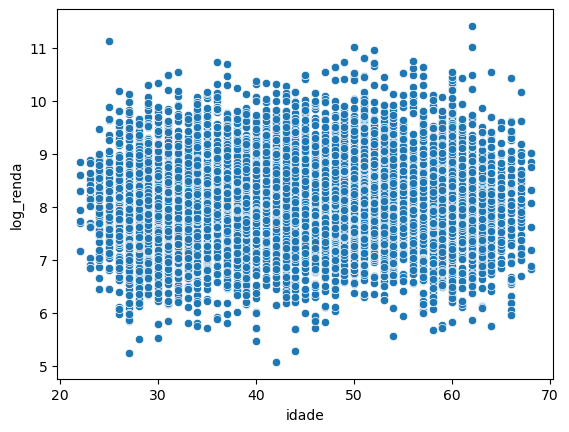

In [71]:
sns.scatterplot(data = df_log, x = 'idade', y = 'log_renda')

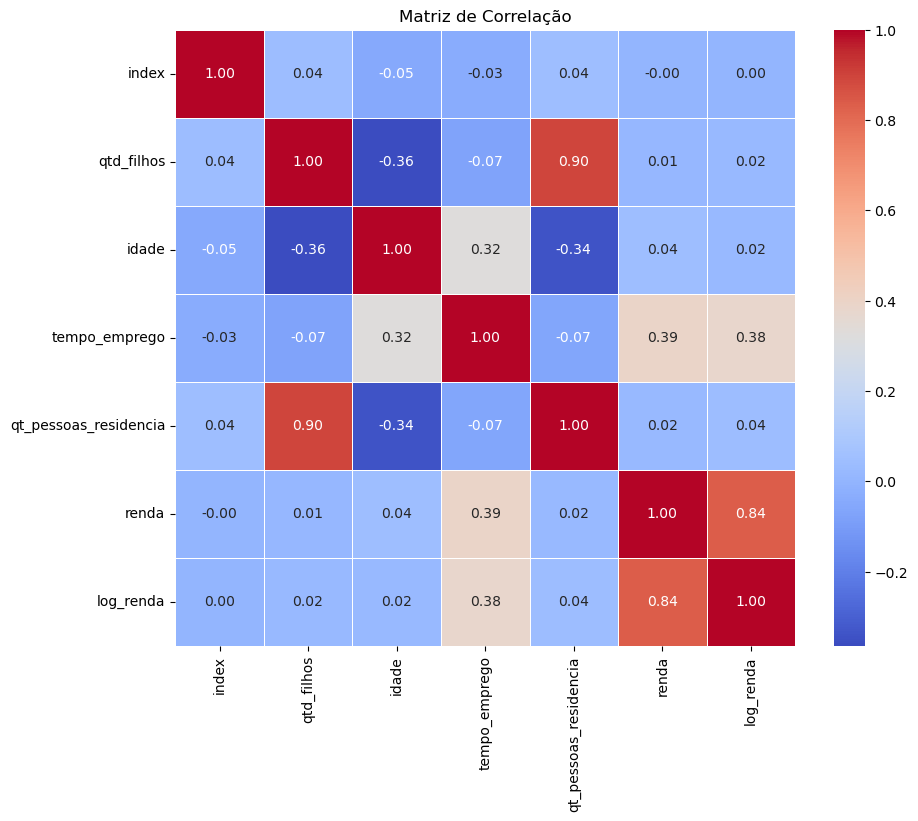

In [69]:
plt.figure(figsize = (10, 8))
sns.heatmap(df_log.select_dtypes(include=['int64', 'float64']).corr(), annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Matriz de Correlação')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do log fez com que o grafico ficasse muito mais linear, alem de nao apresentar mais outliers, olhando para a matriz de correlação apos ser aplicado o log, pode-se ver que não houve mudança significativa da correlação das variaveis, sendo assim a análise fica mais facilitada.